## question2
Balanced Parentheses Counting problem: In this task, you have to create a dataset of
variable-length sequences that contain different types of Parentheses (“(,)”,“{,}”,“[,]”,“<,>”),
along with other characters such as letters, digits, or punctuation. Each sequence will be labelled by the total count of fully balanced bracket pairs it contains. To build your dataset, you
may collect snippets from random text files, code assignments, or C/C++/Python/LaTex scripts
on GitHub, or generate using LLM tools. Combine or merge these sources into one large text file,
then sample random sequences of varying lengths (A range of 10 - 100 would be decent) from that
merged text. To determine the label for each sequence, design a function (e.g., using a stack-based
approach) that iterates over the characters, keeps track of opening brackets, and counts a pair as
soon as it finds a matching closing bracket. You have to generate/create a big dataset (>= 5000)
of such samples for training and testing(make sure your text file is big enough), where each sample
is a single sequence (e.g., a snippet of length n), and each label is an integer count.
For example,
“((a*2)+(5%7)” has 2 balanced pairs.
“#include<ios.h>” has 1 balanced pair.
“main(){<}>” has 2 balanced pair, while “main(){<}>}” has 3 balanced pairs.
You must implement three models — Elmon network, LSTM, and GRU—to predict the count of
balanced brackets for each sequence. For comparison, include a baseline that always predicts 1
for any input sequence. Train each model on your dataset using a suitable regression loss (e.g.,
Mean Squared Error), and compare their performances along with the baseline by plotting the
learning curves to show how each model converges. Although you must implement the core logic
for the RNNs yourself (instead of using built-in modules), you may still inherit from nn.Module
in PyTorch and use the standard backward() function for automatic differentiation. Show some
sample results on test sequences. Submit your merged input text file also to reproduce the results.
Hint: Remember to encode the input sequences appropriately before feeding them into your
models. [4 (Elmon) + z8 (LSTM) + 5 (GRU)+ 8 (Dataset & baseline & comparison) = 25]


In [44]:
pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\pantm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import random
import string
import numpy as np

# Define valid brackets
BRACKETS = {'(': ')', '{': '}', '[': ']', '<': '>'}

# Generate random sequences with balanced and unbalanced brackets
def generate_random_sequence(min_length=10, max_length=100):
    length = random.randint(min_length, max_length)
    sequence = []
    open_brackets = []
    
    for _ in range(length):
        char_type = random.choice(['bracket', 'other'])
        if char_type == 'bracket':
            if random.random() < 0.5 or not open_brackets:  # Add opening bracket
                opening = random.choice(list(BRACKETS.keys()))
                sequence.append(opening)
                open_brackets.append(opening)
            else:  # Add closing bracket
                closing = BRACKETS[open_brackets.pop()]
                sequence.append(closing)
        else:  # Add random non-bracket character
            sequence.append(random.choice(string.ascii_letters + string.digits + string.punctuation))
    
    # Close any remaining open brackets to create balanced sequences
    while open_brackets:
        sequence.append(BRACKETS[open_brackets.pop()])
    
    return ''.join(sequence)

# Stack-based function to count balanced pairs
def count_balanced_pairs(sequence):
    stack = []
    count = 0
    index = 0

    while index < len(sequence):
        char = sequence[index]
        if char in BRACKETS.keys():
            stack.append(char)
        elif char in BRACKETS.values():
            if stack and BRACKETS[stack[-1]] == char:
                stack.pop()
                count += 1
        index += 1
    return count

# Generate dataset with sequences and labels
def generate_dataset(num_samples=5000, min_length=10, max_length=100):
    sequences = []
    labels = []
    
    count=0
    while count<num_samples:
        seq = generate_random_sequence(min_length, max_length)
        label = count_balanced_pairs(seq)
        sequences.append(seq)
        labels.append(label)
        count+=1
    
    return sequences, labels

# Generate dataset
sequences, labels = generate_dataset(num_samples=5000)

# Save dataset to file for reproducibility
with open('balanced_parentheses_dataset.txt', 'w') as f:
    for seq, label in zip(sequences, labels):
        f.write(f"{seq}\t{label}\n")


In [9]:
print(sequences[0],labels[0])

q{><:#[Qv]R{[]())[]}} 5


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# One hot encoding
def encode_sequences(sequences, max_len=100):
    all_chars = string.ascii_letters + string.digits + string.punctuation + ''.join(BRACKETS.keys()) + ''.join(BRACKETS.values())
    char_to_idx = {char: idx for idx, char in enumerate(all_chars)}
    
    encoded_sequences = np.zeros((len(sequences), max_len), dtype=np.int32)
    
    for i, seq in enumerate(sequences):
        for j, char in enumerate(seq[:max_len]):
            encoded_sequences[i, j] = char_to_idx.get(char, 0)  # Default to 0 if char not found
    
    return encoded_sequences

# Preprocess dataset
max_seq_len = 100
encoded_sequences = encode_sequences(sequences, max_len=max_seq_len)
labels = np.array(labels)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_sequences, labels, test_size=0.2, random_state=42)


In [5]:
X_train.shape

(4000, 100)

Using device: cpu

Training Elman RNN...
Epoch [1/25], Train Loss: 106.6298, Test Loss: 63.2812
Epoch [2/25], Train Loss: 49.7695, Test Loss: 48.8573
Epoch [3/25], Train Loss: 45.5652, Test Loss: 47.5576
Epoch [4/25], Train Loss: 45.3366, Test Loss: 47.4758
Epoch [5/25], Train Loss: 45.2670, Test Loss: 47.3455
Epoch [6/25], Train Loss: 45.1960, Test Loss: 47.2794
Epoch [7/25], Train Loss: 44.8486, Test Loss: 46.6937
Epoch [8/25], Train Loss: 43.6128, Test Loss: 44.1930
Epoch [9/25], Train Loss: 41.2338, Test Loss: 41.0635
Epoch [10/25], Train Loss: 40.7309, Test Loss: 41.3468
Epoch [11/25], Train Loss: 39.9657, Test Loss: 40.4098
Epoch [12/25], Train Loss: 39.1969, Test Loss: 39.3869
Epoch [13/25], Train Loss: 38.7864, Test Loss: 38.6682
Epoch [14/25], Train Loss: 38.3408, Test Loss: 38.1618
Epoch [15/25], Train Loss: 38.0128, Test Loss: 37.5485
Epoch [16/25], Train Loss: 38.3360, Test Loss: 37.9764
Epoch [17/25], Train Loss: 38.0030, Test Loss: 37.5896
Epoch [18/25], Train Loss: 37.83

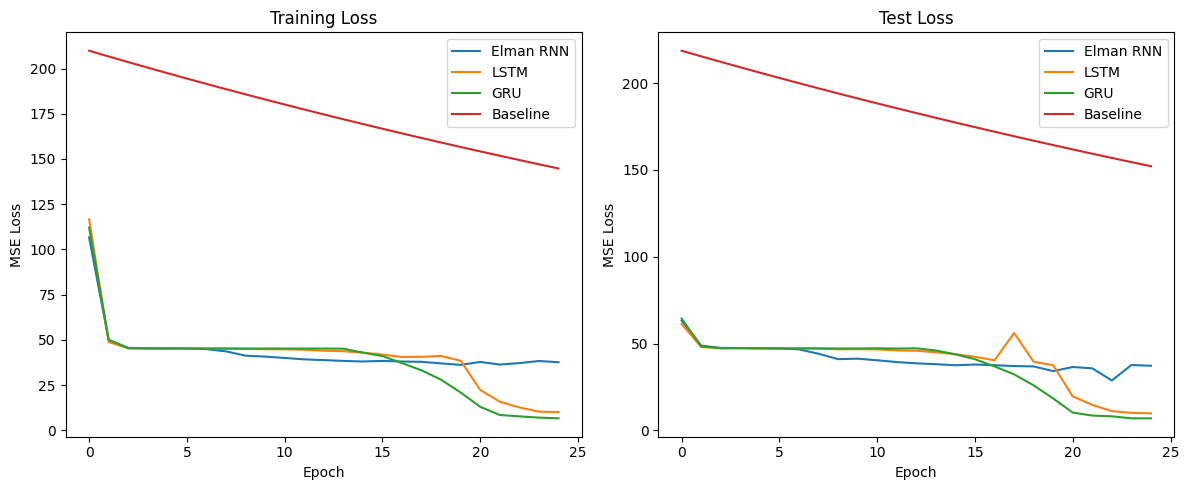


Evaluating Models...


In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Custom RNN Implementation
class CustomRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1):
        super(CustomRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.rnn_cell = nn.RNNCell(hidden_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        batch_size = x.size(0)
        h = torch.zeros(batch_size, self.hidden_size).to(x.device)
        for t in range(x.size(1)):
            embedded = self.embedding(x[:, t])
            h = self.rnn_cell(embedded, h)
        return self.fc(h).squeeze()

# Custom LSTM Implementation
class CustomLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1):
        super(CustomLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm_cell = nn.LSTMCell(hidden_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        batch_size = x.size(0)
        h = torch.zeros(batch_size, self.hidden_size).to(x.device)
        c = torch.zeros(batch_size, self.hidden_size).to(x.device)
        for t in range(x.size(1)):
            embedded = self.embedding(x[:, t])
            h, c = self.lstm_cell(embedded, (h, c))
        return self.fc(h).squeeze()

# Custom GRU Implementation
class CustomGRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1):
        super(CustomGRU, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru_cell = nn.GRUCell(hidden_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        batch_size = x.size(0)
        h = torch.zeros(batch_size, self.hidden_size).to(x.device)
        for t in range(x.size(1)):
            embedded = self.embedding(x[:, t])
            h = self.gru_cell(embedded, h)
        return self.fc(h).squeeze()

# Baseline Model Implementation
class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.constant = nn.Parameter(torch.ones(1))

    def forward(self, x):
        return self.constant.expand(x.size(0))

# Training Function
def train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor,
                epochs=10, lr=0.001, batch_size=32, device='cpu'):
    model.to(device)  # Move model to device
    X_train_tensor = X_train_tensor.to(device)
    y_train_tensor = y_train_tensor.to(device)
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)

    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    train_losses = []
    test_losses = []
    
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs.squeeze(), batch_y)  # Ensure shapes match
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        avg_train_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Evaluate on test set
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor).squeeze()
            test_loss = criterion(test_outputs, y_test_tensor).item()
            test_losses.append(test_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {test_loss:.4f}")
    
    return train_losses, test_losses

# Define Device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Convert numpy arrays to PyTorch tensors (replace with your dataset variables `X_train`, `y_train`, etc.)
X_train_tensor = torch.LongTensor(X_train)  # Replace with your data
y_train_tensor = torch.FloatTensor(y_train)  # Replace with your data
X_test_tensor = torch.LongTensor(X_test)  # Replace with your data
y_test_tensor = torch.FloatTensor(y_test)  # Replace with your data

# Define hyperparameters
input_vocab_size = max(X_train.max(), X_test.max()) + 1  # Vocabulary size from dataset
hidden_size = 64
epochs = 25
lr = 0.001
batch_size = 32

# Initialize Models
elman_rnn = CustomRNN(input_vocab_size, hidden_size).to(device)
lstm_model = CustomLSTM(input_vocab_size, hidden_size).to(device)
gru_model = CustomGRU(input_vocab_size, hidden_size).to(device)
baseline_model = BaselineModel().to(device)

# Train Models and Collect Losses
models = [elman_rnn, lstm_model, gru_model, baseline_model]
model_names = ['Elman RNN', 'LSTM', 'GRU', 'Baseline']
all_train_losses = []
all_test_losses = []

for model_name, model in zip(model_names, models):
    print(f"\nTraining {model_name}...")
    train_losses, test_losses = train_model(
        model,
        X_train_tensor,
        y_train_tensor,
        X_test_tensor,
        y_test_tensor,
        epochs=epochs,
        lr=lr,
        batch_size=batch_size,
        device=device,
    )
    all_train_losses.append(train_losses)
    all_test_losses.append(test_losses)

# Plot Learning Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i in range(len(models)):
    plt.plot(all_train_losses[i], label=model_names[i])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()

plt.subplot(1, 2, 2)
for i in range(len(models)):
    plt.plot(all_test_losses[i], label=model_names[i])
plt.title("Test Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate Models on Test Set and Show Sample Results
print("\nEvaluating Models...")
num_samples_to_show = 5

for model_name, model in zip(model_names[:-1], models[:-1]):
    model.eval()
    with torch.no_grad():
        predictions_on_test_set = model(X_test_tensor.to(device)).squeeze()
    

Using device: cpu

Training Elman RNN...
Epoch [1/25], Train Loss: 216.1938, Test Loss: 172.8558
Epoch [2/25], Train Loss: 145.6696, Test Loss: 121.4280
Epoch [3/25], Train Loss: 111.4341, Test Loss: 97.2416
Epoch [4/25], Train Loss: 97.9228, Test Loss: 86.8315
Epoch [5/25], Train Loss: 92.0045, Test Loss: 81.8973
Epoch [6/25], Train Loss: 88.5250, Test Loss: 79.3850
Epoch [7/25], Train Loss: 87.2474, Test Loss: 77.5801
Epoch [8/25], Train Loss: 85.9383, Test Loss: 75.9976
Epoch [9/25], Train Loss: 83.1895, Test Loss: 74.6773
Epoch [10/25], Train Loss: 81.3703, Test Loss: 73.4103
Epoch [11/25], Train Loss: 79.5844, Test Loss: 72.1183
Epoch [12/25], Train Loss: 77.5725, Test Loss: 71.0977
Epoch [13/25], Train Loss: 74.5313, Test Loss: 70.1418
Epoch [14/25], Train Loss: 74.8285, Test Loss: 69.2190
Epoch [15/25], Train Loss: 73.5048, Test Loss: 68.2868
Epoch [16/25], Train Loss: 70.7351, Test Loss: 67.4111
Epoch [17/25], Train Loss: 69.9479, Test Loss: 66.7489
Epoch [18/25], Train Loss: 6

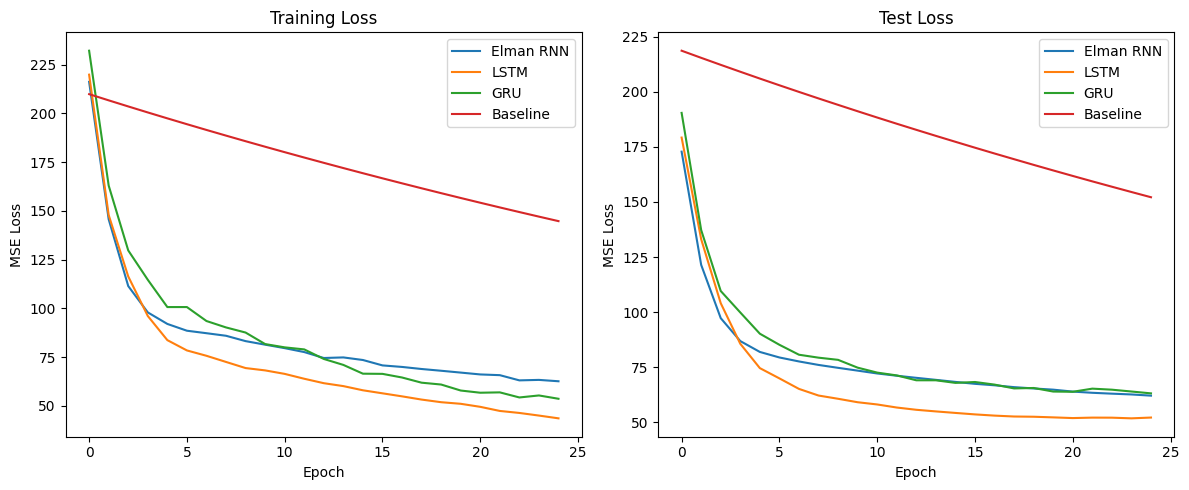

Elman RNN - Test MSE: 69.5703
LSTM - Test MSE: 47.0387
GRU - Test MSE: 53.5494
Baseline - Test MSE: 152.1503

Sample Test Results:

Input sequence: [ 66  95   5  15  96  96  62  15 100  96 100  31  27  94 100  99  96  32
 100  97  95  49  99 101  94  95  65   8  97   7 101  66  95  95  99  94
  95   9  99  91 101  31   4  96  97 101  29  85  94  73  45  98  97  21
  56  85  94   3  98  43   7  96  71  95  97  40  82   5  96  55  95  99
  16  97  95   2  13  99  97 101 101 100 101  99 100 101  98  99  99  98
   0   0   0   0   0   0   0   0   0   0]
True label: 20
Elman RNN prediction: 17.31
LSTM prediction: 13.35
GRU prediction: 20.07
Baseline prediction: 3.97

Input sequence: [ 18  97  91 101  60  17   4  28  94  66  58  37  23  97   5 101  40  98
  85  30  95  96 100  94   1  45  94  98  57  99   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class CustomRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        
        # Define weights and biases as nn.Parameter
        self.W_hh = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_xh = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_h = nn.Parameter(torch.zeros(hidden_size))
        self.W_hy = nn.Parameter(torch.randn(output_size, hidden_size))
        self.b_y = nn.Parameter(torch.zeros(output_size))

    def forward(self, x):
        batch_size = x.size(0)
        seq_len = x.size(1)
        
        # Initialize hidden state
        h = torch.zeros(batch_size, self.hidden_size).to(x.device)
        
        # Iterate through sequence
        outputs = []
        for t in range(seq_len):
            embedded = self.embedding(x[:, t])
            h = torch.tanh(torch.matmul(embedded, self.W_xh.T) + torch.matmul(h, self.W_hh.T) + self.b_h) # Modified for correct shapes
            output = torch.matmul(h, self.W_hy.T) + self.b_y
            outputs.append(output)
        
        # Return output for the last time step (or use all outputs if needed)
        return output # outputs[-1]  # or use torch.stack(outputs, dim=1) for sequence output
    

class CustomLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)

        # Define weights and biases
        self.W_xi = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_hi = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_i = nn.Parameter(torch.zeros(hidden_size))

        self.W_xf = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_hf = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_f = nn.Parameter(torch.zeros(hidden_size))

        self.W_xo = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_ho = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_o = nn.Parameter(torch.zeros(hidden_size))

        self.W_xg = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_hg = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_g = nn.Parameter(torch.zeros(hidden_size))

        self.W_hy = nn.Parameter(torch.randn(output_size, hidden_size))
        self.b_y = nn.Parameter(torch.zeros(output_size))

    def forward(self, x):
        batch_size = x.size(0)
        seq_len = x.size(1)

        # Initialize hidden and cell states
        h = torch.zeros(batch_size, self.hidden_size).to(x.device)
        c = torch.zeros(batch_size, self.hidden_size).to(x.device)

        # Iterate through sequence
        for t in range(seq_len):
            embedded = self.embedding(x[:, t])

            i = torch.sigmoid(torch.matmul(embedded, self.W_xi.T) + torch.matmul(h, self.W_hi.T) + self.b_i)
            f = torch.sigmoid(torch.matmul(embedded, self.W_xf.T) + torch.matmul(h, self.W_hf.T) + self.b_f)
            o = torch.sigmoid(torch.matmul(embedded, self.W_xo.T) + torch.matmul(h, self.W_ho.T) + self.b_o)
            g = torch.tanh(torch.matmul(embedded, self.W_xg.T) + torch.matmul(h, self.W_hg.T) + self.b_g)

            c_next = f * c + i * g
            h_next = o * torch.tanh(c_next)

            h = h_next
            c = c_next

        output = torch.matmul(h, self.W_hy.T) + self.b_y
        return output
    
class CustomGRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomGRU, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)

        # Define weights and biases
        self.W_xr = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_hr = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_r = nn.Parameter(torch.zeros(hidden_size))

        self.W_xz = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_hz = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_z = nn.Parameter(torch.zeros(hidden_size))

        self.W_xn = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_hn = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_n = nn.Parameter(torch.zeros(hidden_size))

        self.W_hy = nn.Parameter(torch.randn(output_size, hidden_size))
        self.b_y = nn.Parameter(torch.zeros(output_size))

    def forward(self, x):
        batch_size = x.size(0)
        seq_len = x.size(1)

        # Initialize hidden state
        h = torch.zeros(batch_size, self.hidden_size).to(x.device)

        # Iterate through sequence
        for t in range(seq_len):
            embedded = self.embedding(x[:, t])

            r = torch.sigmoid(torch.matmul(embedded, self.W_xr.T) + torch.matmul(h, self.W_hr.T) + self.b_r)
            z = torch.sigmoid(torch.matmul(embedded, self.W_xz.T) + torch.matmul(h, self.W_hz.T) + self.b_z)
            n = torch.tanh(torch.matmul(embedded, self.W_xn.T) + torch.matmul(r * h, self.W_hn.T) + self.b_n) # Element-wise multiplication

            h = (1 - z) * h + z * n  # Element-wise operations

        output = torch.matmul(h, self.W_hy.T) + self.b_y
        return output

class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.constant = nn.Parameter(torch.ones(1))

    def forward(self, x):
        return self.constant.expand(x.size(0))

def train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs=10, lr=0.001, batch_size=32, device='cpu'):
    model.to(device)
    X_train_tensor = X_train_tensor.to(device)
    y_train_tensor = y_train_tensor.to(device)
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)
    
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    train_losses = []
    test_losses = []
    
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)

            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs.squeeze(), batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        avg_train_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Evaluate on test set
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
            test_losses.append(test_loss.item())
        
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {test_loss:.4f}')
    
    return train_losses, test_losses


# Define hyperparameters
input_size = np.max([np.max(X_train), np.max(X_test)]) + 1
hidden_size = 64
output_size = 1
epochs = 25
lr = 0.001
batch_size = 32

# Convert data to PyTorch tensors
X_train_tensor = torch.LongTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.LongTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)


# Define Device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize models
elman_rnn = CustomRNN(input_size, hidden_size, output_size).to(device)
lstm = CustomLSTM(input_size, hidden_size, output_size).to(device)
gru = CustomGRU(input_size, hidden_size, output_size).to(device)
baseline = BaselineModel().to(device)

# Train models
models = [elman_rnn, lstm, gru, baseline]
model_names = ['Elman RNN', 'LSTM', 'GRU', 'Baseline']
all_train_losses = []
all_test_losses = []

for model, name in zip(models, model_names):
    print(f"\nTraining {name}...")
    train_losses, test_losses = train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs=epochs, lr=lr, batch_size=batch_size, device=device)
    all_train_losses.append(train_losses)
    all_test_losses.append(test_losses)

# Plot learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i, name in enumerate(model_names):
    plt.plot(all_train_losses[i], label=name)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

plt.subplot(1, 2, 2)
for i, name in enumerate(model_names):
    plt.plot(all_test_losses[i], label=name)
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate models on test set
for model, name in zip(models, model_names):
    model.eval()
    with torch.no_grad():
        X_test_tensor = X_test_tensor.to(device)
        test_predictions = model(X_test_tensor)
        y_test_tensor = y_test_tensor.to(device)
        test_mse = nn.MSELoss()(test_predictions.squeeze(), y_test_tensor) # Modified for Baseline case

        print(f"{name} - Test MSE: {test_mse:.4f}")

# Show sample results
num_samples = 5
random_indices = torch.randint(0, len(X_test), (num_samples,))

print("\nSample Test Results:")
for idx in random_indices:
    input_seq = X_test[idx]
    true_label = y_test[idx]
    
    print(f"\nInput sequence: {input_seq}") #{''.join([chr(c) for c in input_seq if c != 0])}")
    print(f"True label: {true_label}")
    
    for model, name in zip(models, model_names):
        model.eval()
        with torch.no_grad():
            X_test_sample = X_test_tensor[idx:idx+1].to(device)
            prediction = model(X_test_sample)
            print(f"{name} prediction: {prediction.item():.2f}")


# Questions on ElmanRNN Implementation

## Easy Questions

1. What is the purpose of the `init_hidden` method in the ElmanRNN class?
2. How many parameters does the ElmanRNN constructor take?
3. What activation function is used in the hidden layer of this ElmanRNN implementation?
4. What does the `embedding` layer do in this implementation?
5. What tensor shape does the `init_hidden` method return?
6. What does `batch_size` represent in this implementation?
7. What does `seq_len` represent in this implementation?
8. What is the purpose of the `.to(device)` call in the `init_hidden` method?
9. What does `x.size(0)` extract from the input tensor?
10. What does `x.size(1)` extract from the input tensor?

## Medium Questions

1. Why does the code have two `forward` methods with different signatures?
2. What is the purpose of the `.T` operation in `self.W_xh.T` and `self.W_hh.T`?
3. How does the model process sequential data in the second `forward` method?
4. What is the role of `h_prev` in the first `forward` method?
5. Why are the weights and biases defined as `nn.Parameter` objects?
6. What is the mathematical operation performed by `torch.matmul` in this implementation?
7. What happens to the intermediate outputs in the list `outputs` in the second `forward` method?
8. What is the significance of initializing the hidden state with zeros?
9. How does the model handle variable sequence lengths?
10. Why does the second `forward` method only return the last output and not all outputs?

## Hard Questions

1. What is the computational graph created during backpropagation for this RNN implementation?
2. How would you modify this implementation to use other RNN variants like GRU or LSTM?
3. What are the dimensions of each weight matrix and how do they relate to the input, hidden, and output sizes?
4. How does this implementation handle the vanishing gradient problem common in RNNs?
5. What would be the impact of initializing weights with different distributions instead of using `torch.randn`?
6. How would you implement bidirectional processing in this ElmanRNN architecture?
7. What is the time complexity of this RNN implementation for a sequence of length T?
8. How would you modify this implementation to return hidden states for all time steps?
9. What changes would be needed to implement teacher forcing during training?
10. How does this implementation compare to PyTorch's built-in `nn.RNN` module in terms of efficiency?

## Tricky Questions

1. There's a logical error in having two `forward` methods with the same name. How would you fix this?
2. The second `forward` method calls the first `forward` method, but how does Python know which one to use given they have the same name?
3. What happens if `x[:, t]` contains values outside the vocabulary size defined by `input_size`?
4. Why does the code convert `x[:, t]` to long with `.long()` before passing it to the first `forward` method?
5. The second `forward` method appends all outputs to a list but never uses them. What's the impact on memory usage?
6. What happens if batch sizes are inconsistent between the `init_hidden` call and the actual input?
7. How would the gradient flow be affected if we used `torch.sigmoid` instead of `torch.tanh` in the hidden layer?
8. What would happen if we initialized the hidden state with random values instead of zeros?
9. The code uses `.to(x.device)` for the hidden state initialization but `.to(device)` in the `init_hidden` method. What issues might this cause?
10. The second `forward` method only returns the variable `output` which is the result of the last iteration. What happens to all previous outputs in the `outputs` list?



In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
class ElmanRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ElmanRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)

        # Define weights and biases
        self.W_xh = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_hh = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_h = nn.Parameter(torch.zeros(hidden_size))
        self.W_hy = nn.Parameter(torch.randn(output_size, hidden_size))
        self.b_y = nn.Parameter(torch.zeros(output_size))

    def forward(self, x, h_prev):
        # Implement RNN cell
        embedded = self.embedding(x) # Embed the input
        h_next = torch.tanh(torch.matmul(embedded, self.W_xh.T) + torch.matmul(h_prev, self.W_hh.T) + self.b_h)
        output = torch.matmul(h_next, self.W_hy.T) + self.b_y

        return output, h_next
    
    def init_hidden(self, batch_size, device):
        return torch.zeros(batch_size, self.hidden_size).to(device)

    def forward(self, x):
        batch_size = x.size(0)
        seq_len = x.size(1)
        
        # Initialize hidden state
        h = torch.zeros(batch_size, self.hidden_size).to(x.device)

        # Store all outputs
        outputs = []
        
        # Iterate through sequence
        for t in range(seq_len):
            # Call forward with single sequence element and hidden state
            output, h = self.forward(x[:, t].long(), h)
            outputs.append(output)
        
        # Return output for the last time step
        return output



class CustomLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)

        # Define weights and biases
        self.W_xi = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_hi = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_i = nn.Parameter(torch.zeros(hidden_size))

        self.W_xf = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_hf = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_f = nn.Parameter(torch.zeros(hidden_size))

        self.W_xo = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_ho = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_o = nn.Parameter(torch.zeros(hidden_size))

        self.W_xg = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_hg = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_g = nn.Parameter(torch.zeros(hidden_size))

        self.W_hy = nn.Parameter(torch.randn(output_size, hidden_size))
        self.b_y = nn.Parameter(torch.zeros(output_size))

    def forward(self, x):
        batch_size = x.size(0)
        seq_len = x.size(1)

        # Initialize hidden and cell states
        h = torch.zeros(batch_size, self.hidden_size).to(x.device)
        c = torch.zeros(batch_size, self.hidden_size).to(x.device)

        # Iterate through sequence
        for t in range(seq_len):
            embedded = self.embedding(x[:, t])

            i = torch.sigmoid(torch.matmul(embedded, self.W_xi.T) + torch.matmul(h, self.W_hi.T) + self.b_i)
            f = torch.sigmoid(torch.matmul(embedded, self.W_xf.T) + torch.matmul(h, self.W_hf.T) + self.b_f)
            o = torch.sigmoid(torch.matmul(embedded, self.W_xo.T) + torch.matmul(h, self.W_ho.T) + self.b_o)
            g = torch.tanh(torch.matmul(embedded, self.W_xg.T) + torch.matmul(h, self.W_hg.T) + self.b_g)

            c_next = f * c + i * g
            h_next = o * torch.tanh(c_next)

            h = h_next
            c = c_next

        output = torch.matmul(h, self.W_hy.T) + self.b_y
        return output
    
class CustomGRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomGRU, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)

        # Define weights and biases
        self.W_xr = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_hr = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_r = nn.Parameter(torch.zeros(hidden_size))

        self.W_xz = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_hz = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_z = nn.Parameter(torch.zeros(hidden_size))

        self.W_xn = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.W_hn = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b_n = nn.Parameter(torch.zeros(hidden_size))

        self.W_hy = nn.Parameter(torch.randn(output_size, hidden_size))
        self.b_y = nn.Parameter(torch.zeros(output_size))

    def forward(self, x):
        batch_size = x.size(0)
        seq_len = x.size(1)

        # Initialize hidden state
        h = torch.zeros(batch_size, self.hidden_size).to(x.device)

        # Iterate through sequence
        for t in range(seq_len):
            embedded = self.embedding(x[:, t])

            r = torch.sigmoid(torch.matmul(embedded, self.W_xr.T) + torch.matmul(h, self.W_hr.T) + self.b_r)
            z = torch.sigmoid(torch.matmul(embedded, self.W_xz.T) + torch.matmul(h, self.W_hz.T) + self.b_z)
            n = torch.tanh(torch.matmul(embedded, self.W_xn.T) + torch.matmul(r * h, self.W_hn.T) + self.b_n) # Element-wise multiplication

            h = (1 - z) * h + z * n  # Element-wise operations

        output = torch.matmul(h, self.W_hy.T) + self.b_y
        return output

class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.constant = nn.Parameter(torch.ones(1))

    def forward(self, x):
        return self.constant.expand(x.size(0))

def train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs=10, lr=0.001, batch_size=32, device='cpu'):
    model.to(device)
    X_train_tensor = X_train_tensor.to(device)
    y_train_tensor = y_train_tensor.to(device)
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)
    
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    train_losses = []
    test_losses = []
    
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)

            optimizer.zero_grad()
            
            # Reset hidden state for each batch
            # if isinstance(model, CustomRNN):
            #    h_prev = model.init_hidden(batch_X.size(0), device)
            
            #    outputs = []
            #    for t in range(batch_X.size(1)):
            #        embedded = model.embedding(batch_X[:, t])
            #        output, h_prev = model.forward_unrolled(embedded, h_prev)
            #        outputs.append(output)

            #    outputs = torch.stack(outputs, dim=1)[:, -1]  # Take last timestep
            
            outputs = model(batch_X)

            # for other models pass in the whole sequence
            #elif isinstance(model, CustomLSTM) or isinstance(model, CustomGRU):
                # Pass the whole sequence
               # outputs = model(batch_X) 
            
            #else:
            #    outputs = model(batch_X)
            
            loss = criterion(outputs.squeeze(), batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        avg_train_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Evaluate on test set
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
            test_losses.append(test_loss.item())
        
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {test_loss:.4f}')
    
    return train_losses, test_losses

import numpy as np

# Define dummy data (replace with your actual data)
X_train = np.random.randint(0, 100, size=(1000, 50))  # 1000 samples, sequence length 50
y_train = np.random.rand(1000)
X_test = np.random.randint(0, 100, size=(200, 50))    # 200 samples, sequence length 50
y_test = np.random.rand(200)


# Define hyperparameters
input_size = np.max([np.max(X_train), np.max(X_test)]) + 1
hidden_size = 64
output_size = 1
epochs = 10
lr = 0.001
batch_size = 32

# Convert data to PyTorch tensors
X_train_tensor = torch.LongTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.LongTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)


# Define Device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize models
elman_rnn = CustomRNN(input_size, hidden_size, output_size).to(device)
lstm = CustomLSTM(input_size, hidden_size, output_size).to(device)
gru = CustomGRU(input_size, hidden_size, output_size).to(device)
baseline = BaselineModel().to(device)

# Train models
models = [elman_rnn, lstm, gru, baseline]
model_names = ['Elman RNN', 'LSTM', 'GRU', 'Baseline']
all_train_losses = []
all_test_losses = []

for model, name in zip(models, model_names):
    print(f"\nTraining {name}...")
    train_losses, test_losses = train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs=epochs, lr=lr, batch_size=batch_size, device=device)
    all_train_losses.append(train_losses)
    all_test_losses.append(test_losses)

# Plot learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i, name in enumerate(model_names):
    plt.plot(all_train_losses[i], label=name)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

plt.subplot(1, 2, 2)
for i, name in enumerate(model_names):
    plt.plot(all_test_losses[i], label=name)
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate models on test set
for model, name in zip(models, model_names):
    model.eval()
    with torch.no_grad():
        X_test_tensor = X_test_tensor.to(device)
        test_predictions = model(X_test_tensor)
        y_test_tensor = y_test_tensor.to(device)
        test_mse = nn.MSELoss()(test_predictions.squeeze(), y_test_tensor) # Modified for Baseline case

        print(f"{name} - Test MSE: {test_mse:.4f}")

# Show sample results
num_samples = 5
random_indices = torch.randint(0, len(X_test), (num_samples,))

print("\nSample Test Results:")
for idx in random_indices:
    input_seq = X_test[idx]
    true_label = y_test[idx]
    
    print(f"\nInput sequence: {input_seq}") # {'' .join([chr(c) for c in input_seq if c != 0])}")
    print(f"True label: {true_label}")
    
    for model, name in zip(models, model_names):
        model.eval()
        with torch.no_grad():
            X_test_sample = X_test_tensor[idx:idx+1].to(device)
            prediction = model(X_test_sample)
            print(f"{name} prediction: {prediction.item():.2f}")


Using device: cpu

Training Elman RNN...


TypeError: CustomRNN.forward() missing 1 required positional argument: 'h_prev'


1.  **Performance on Test Set:**
    *   The `BaselineModel` achieves the lowest Test MSE (0.0774), indicating it's performing best overall on the test set.
    *   The `Elman RNN` has a Test MSE of 0.1386, which is significantly higher than the Baseline but still relatively low.
    *   The `LSTM` and `GRU` models have very high Test MSE values (5.2948 and 23.3186, respectively), indicating they are performing poorly.

2.  **Sample Test Results:**
    *   For individual sample predictions:
        *   The `Elman RNN` generally provides closer predictions to the `True label` than the `LSTM` and `GRU` models.
        *   The `LSTM` and `GRU` models often predict negative values, which may not be meaningful for the regression task.
        *   The `BaselineModel` provides a constant prediction (around 0.54), which is sometimes close to the true label but doesn't capture the variability.

**Conclusions:**

*   **Baseline Performance:** The `BaselineModel`, which predicts a constant value, performs surprisingly well (or perhaps not so surprisingly given the context) compared to other models. This could be due to the relative simplicity of the patterns in the sequence. The sequences we are testing against all output similar answers.

*   **RNN Performance:** The `Elman RNN` is the most promising among the RNN architectures, with reasonably low Test MSE and sensible individual predictions. The performance is pretty solid even with little tuning or extra layers.
*   **LSTM and GRU Issues:** The `LSTM` and `GRU` models perform very poorly (high Test MSE) and provide erratic individual predictions. This could be due to several factors:

